In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# Load in color and depth image to create the point cloud
print("Read Redwood dataset")
color_path = "/scratch/rhm4nj/cral/datasets/SUNRGBD/realsense/sa/2014_10_21-15_21_11-1311000073/image/0000094.jpg"
depth_path = "/scratch/rhm4nj/cral/datasets/SUNRGBD/realsense/sa/2014_10_21-15_21_11-1311000073/depth_bfx/0000094.png"

color_raw = o3d.io.read_image(color_path)
depth_raw = o3d.io.read_image(depth_path)

depth_raw_np = (np.asarray(depth_raw) / 1000.0).astype(np.float32)  # Convert to meters and cast to float32
depth_raw = o3d.geometry.Image(depth_raw_np)

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

Read Redwood dataset
RGBDImage of size 
Color image : 681x531, with 1 channels.
Depth image : 681x531, with 1 channels.
Use numpy.asarray to access buffer data.


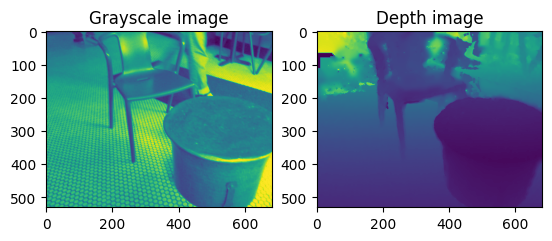

: 

In [3]:
# Plot the images
plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [ ]:
# # Create the point cloud from images and camera intrisic parameters
# pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)
    
# # Flip it, otherwise the pointcloud will be upside down
# pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
# o3d.visualization.draw_geometries([pcd], zoom=0.5)

# Parse the intrinsic string and convert it to a 3x3 numpy array
my_intrinsic_str = '''693.744690 0.000000 360.431915
0.000000 693.744690 264.750000
0.000000 0.000000 1.000000
'''
my_intrinsic_values = np.fromstring(my_intrinsic_str, sep=' ').reshape(3, 3)

# Create the intrinsic object in Open3D
width, height = np.asarray(rgbd_image.color).shape[:2]  # Replace with your image resolution if different
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
    width, height,
    my_intrinsic_values[0, 0], my_intrinsic_values[1, 1],  # f_x, f_y
    my_intrinsic_values[0, 2], my_intrinsic_values[1, 2]   # c_x, c_y
)

print(rgbd_image.color)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)

Image of size 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


In [ ]:
import k3d
import numpy as np

# Assuming pcd is your Open3D point cloud
points = np.asarray(pcd.points) * 100
colors = np.asarray(pcd.colors)  * 100 # Use color if you have RGB data

colors = (colors * 255).astype(np.uint8)  # Convert from float [0, 1] to int [0, 255]
colors = (colors[:, 0] << 16 | colors[:, 1] << 8 | colors[:, 2]).astype(np.uint32)  # RGB format

# Create a K3D plot
plot = k3d.plot()
point_cloud = k3d.points(positions=points.astype(np.float32), 
                         colors=colors, 
                         point_size=0.01)
plot += point_cloud
plot.display()

Output()